**Grover Search Party**

In [5]:
import os
os.environ["OPENAI_API_KEY"] = ""

In [ ]:
!pip install langchain
!pip install langchain[llms]
!pip install openai

In [6]:
from langchain.llms import OpenAI
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain

In [7]:
llm = OpenAI(temperature=0.0)
template = """Create a boolean expression that expresses the following situation:

Situation: Alice and Bob are in a relationship, as are Carol and David. However, Alice and David had a bad breakup a while ago and haven't been civil with each other since.
Expression: ((Alice & Bob) | (Carol & David)) & ~(Alice and David)

Situation: {situation}
Expression:"""

prompt_template = PromptTemplate(
    input_variables=["situation"],
    template=template,
)

chain = LLMChain(llm=llm, prompt=prompt_template)

In [8]:
from qiskit.algorithms import AmplificationProblem, Grover
from qiskit.circuit.library import PhaseOracle
from qiskit import Aer
from qiskit.visualization import plot_histogram

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [9]:
situation = """There are four people, Abe, Amira, Jin, Olivia. Abe and Olivia are good friends from Qiskit Camp. 
Abe and Amira just had a big fight and don't want to hang"""

bool_expr = chain.run(situation).strip()
print(bool_expr)
oracle = PhaseOracle(bool_expr)

problem = AmplificationProblem(oracle)

((Abe & Olivia) | (Amira & Jin)) & ~(Abe & Amira)


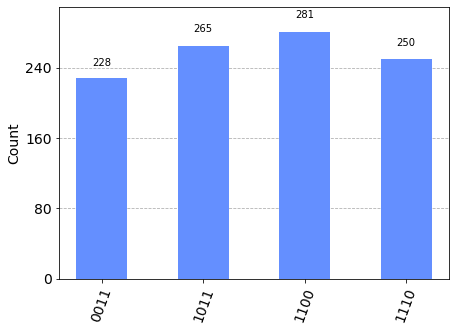

In [10]:
backend = Aer.get_backend("aer_simulator")

grover = Grover(quantum_instance=backend)
result = grover.amplify(problem)
counts = result.circuit_results
plot_histogram(counts)